___
# Aprendizado de máquina em IoT para Sistemas Inteligentes de Transporte


## Contexto

<div style="text-align: justify">
Os Sistemas Inteligentes de Transporte (ITS) operam com aplicações que visam tornar os sistemas de transporte mais eficientes, confortáveis e seguros. A infraestrutura que suporta as aplicações ITS utiliza, para trocas de mensagens, as redes de comunicação veiculares, que são formadas por veículos que podem ser conectados uns aos outros, bem como à infra-estrutura das cidades, e estão sujeitas a constantes alterações de topologia, desconexões e congestionamento de dados.
</div>

<br>

<div style="text-align: justify">
De forma a suportar os requisitos de comunicação das diversas aplicações, a infraestrutura de rede precisa dinamicamente efetuar as configurações necessárias, em função das mudanças que ocorrem no ambiente.
</div>

<br>

<div style="text-align: justify">
Os veículos, dotados de sensores e dispositivos de comunicação para trocas de mensagens, possuem as características que permitem classificar as redes de comunicação com esses elementos como redes IoT.
</div>

**Referências:**
<br>
https://news.itu.int/putting-the-iot-vs-its-debate-to-rest/
<br>
https://www.ericsson.com/en/blog/2019/3/cellular-iot-for-cars
<br>
https://www.ericsson.com/en/white-papers/cellular-iot-evolution-for-industry-digitalization
<br>
https://www.ibm.com/internet-of-things/solutions/iot-platform/vehicle-connectivity-and-analytic-insights
<br>
https://ieeexplore.ieee.org/document/7946780



## Objetivo

<div style="text-align: justify">
    
Efetuar um estudo para analisar a **viabilidade do uso de técnicas de mineração de dados**, com algoritmos de aprendizado de máquina, para **identificar padrões de congestionamento** nos dados coletados referente a comunicação em uma rede de comunicação veicular com diversas aplicações, a fim de que se possa **utilizar futuramente os resultados** como entrada para que o controle da rede atue dinamicamente, **melhorando a eficência no atendimento aos requisitos de comunicação das aplicações**. 
</div>

## Dados utilizados

<div style="text-align: justify">
    
Será utilizado um dataset composto por **900 observações** obtidas em um **experimento onde foi emulada uma rede definida por software** com 15 veículos se comunicando com diferentes servidores de aplicacões. Durante o período de emulação, os **veículos se movimentam** conforme a dinâmica de um típico congestionmento urbano, sendo que essa dinâmica reflete também no congestionamento dos dados na rede. 
</div>

<br>

<div style="text-align: justify">
    
O dataset é composto por **informações de atraso de pacotes (em milisegundos), taxas de transmissão e recepção (em kilobits por segundo), além do percentual de perda de pacotes**. Cada observação foi **classificada** em uma dentre quatro classes: sem congestionamento (classe 0) ou com diferentes níveis de congestionamento (classes 1, 2 e 3).
</div>

## Abordagem

<div style="text-align: justify">
Como trata-se de um dataset com os dados classificados e o objetivo é classificar as observações coletadas na rede de comunicação, serão utilizados para mineração algoritmos de aprendizado de máquina para uma abordagem supervisionada.
</div>

<br>

<div style="text-align: justify">
    
Utilizando o Scikit-learn, que é um pacote de ferramentas de Machine Learn em Python, são avaliados os seguintes algoritmos: **Regressão logística**, **KNN (K-Nearest Neighbors)**, **Decision Tree, Random Forest** e 
**SVM (Support Vector Machines)**
</div>

### Métricas

<div style="text-align: justify">
Para cada algoritmo, os resultados são avaliados utilizando-se como métrica a matriz de confusão correspondente e os resultados de precisão, recall e f1-score, que são calculados conforme as fórmulas seguintes:

\begin{equation*}
Precision = \frac{TP}{(TP + FP)}
\end{equation*}

\begin{equation*}
Recall = \frac{TP}{(TP + FN)}
\end{equation*}

Onde: $TP$ = verdadeiros positivos, $FP$ = falsos positivos e $FN$ = falsos negativos

\begin{equation*}
F1 score = \frac{2 * Precision * Recall}{(Precision + Recall)}
\end{equation*}

</div>

# Implementação

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [42]:
from IPython.display import Image

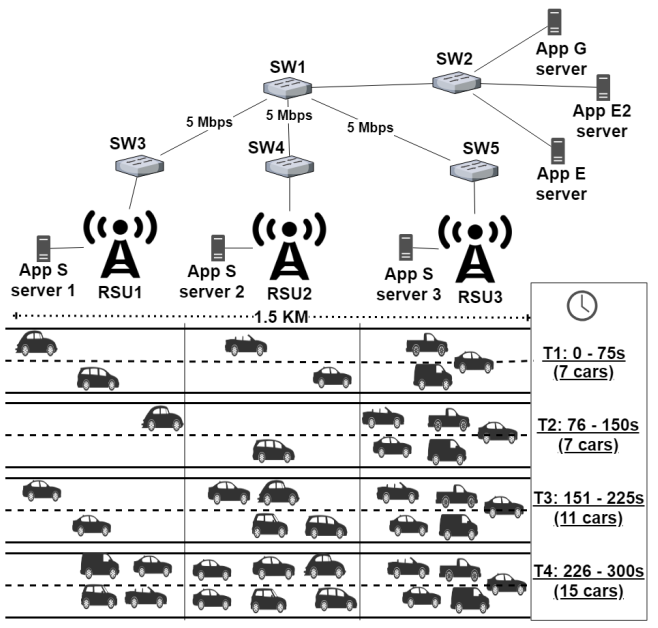

In [43]:
data = 'C:/Users/sarai/Documents/R/projects/itsml1/topology.png'
Image(data,width=500, height=600 )

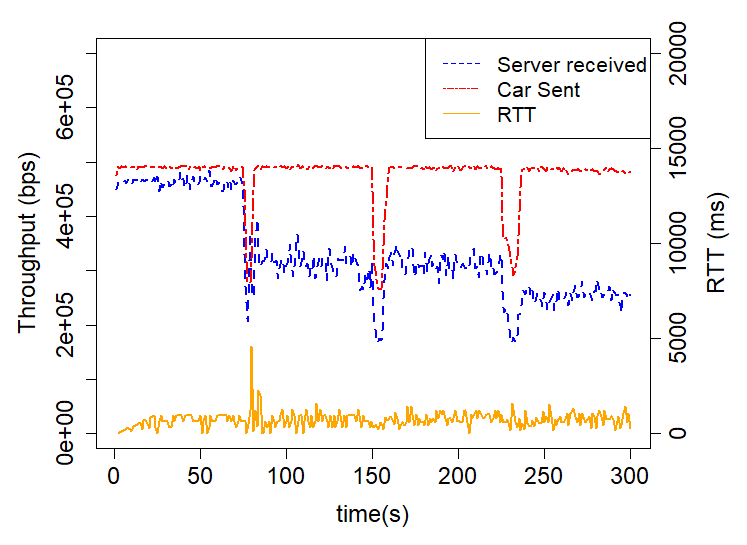

In [44]:
data = 'C:/Users/sarai/Documents/R/projects/itsml1/ebe.png'
Image(data,width=500, height=600 )

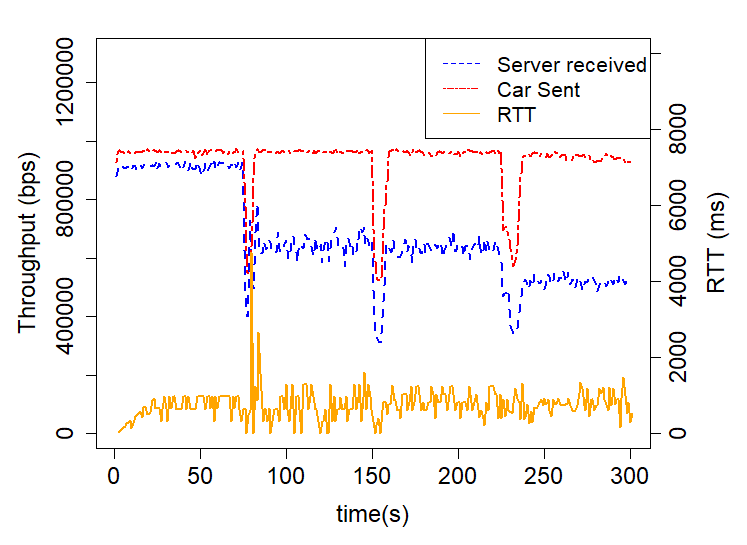

In [45]:
data = 'C:/Users/sarai/Documents/R/projects/itsml1/e2be.png'
Image(data,width=500, height=600 )

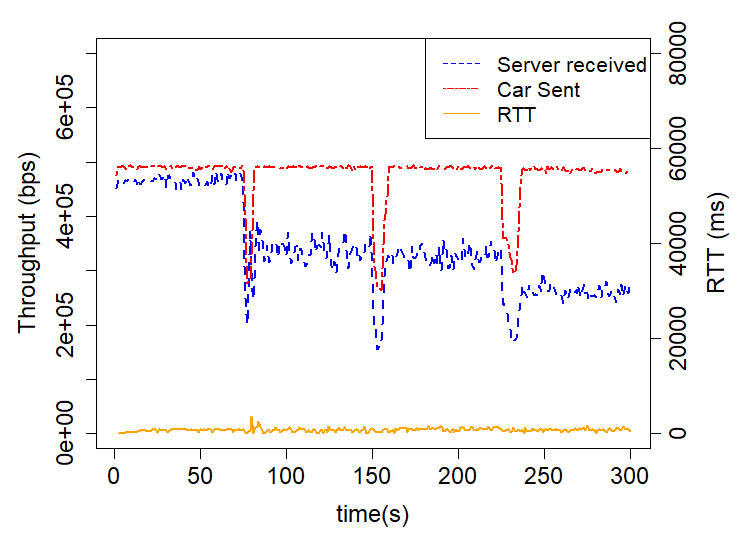

In [46]:
data = 'C:/Users/sarai/Documents/R/projects/itsml1/gbe.png'
Image(data,width=500, height=600 )

In [47]:
trace1 = pd.read_csv(r"C:\Users\sarai\Documents\R\projects\itsml1\trace3.csv", sep=' ')

In [48]:
trace1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 900
Data columns (total 5 columns):
tx     900 non-null float64
rx     900 non-null float64
rtt    900 non-null float64
pdr    900 non-null float64
t1     900 non-null int64
dtypes: float64(4), int64(1)
memory usage: 42.2 KB


In [49]:
trace1.head()

,tx,rx,rtt,pdr,t1
1,475936.0,450256.0,31.000000,0.946043,0
2,491344.0,462240.0,62.701429,0.940767,0
3,487920.0,469088.0,104.638571,0.961404,0
4,491344.0,467376.0,152.961000,0.951220,0
5,489632.0,463952.0,201.494286,0.947552,0


In [50]:
trace1['t1'].unique()

array([0, 1, 2, 3], dtype=int64)

Text(0.5, 0, 't1')

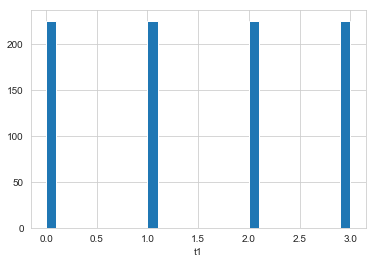

In [51]:
sns.set_style('whitegrid')
trace1['t1'].hist(bins=30)
plt.xlabel('t1')

C:\Users\sarai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sarai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


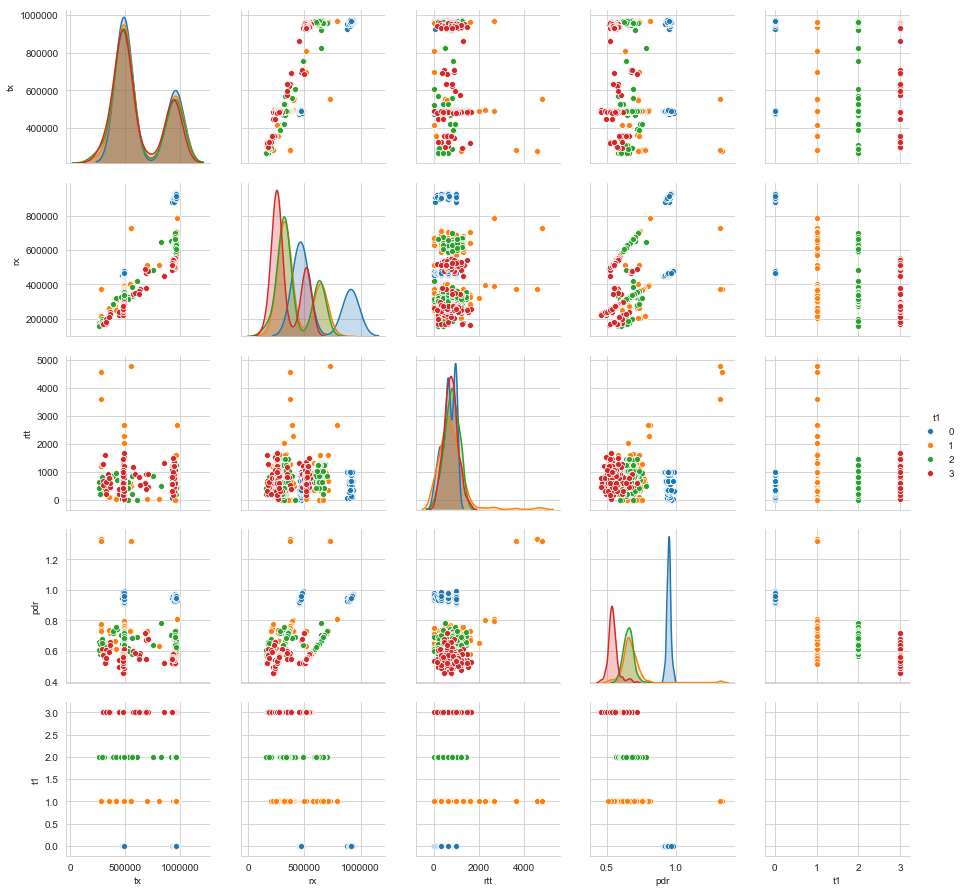

In [52]:
sns.pairplot(trace1, hue='t1')

# Uniformizando os dados

<div style="text-align: justify">
Padronização (ou normalização do escore Z) é o processo de redimensionamento dos recursos para que eles tenham as propriedades de uma distribuição gaussiana com $\mu=0$ e $\sigma =1$, onde $\mu$ é a média e $\sigma$ o desvio padrão; os escores padrão (também chamados de escores z) das amostras são calculados da seguinte forma:

\begin{equation*}
z = \frac{x - \mu}{\sigma}
\end{equation*}

</div>

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(trace1.drop('t1',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
scaled_features = scaler.transform(trace1.drop('t1',axis=1))

In [57]:
df_feat = pd.DataFrame(scaled_features,columns=trace1.columns[:-1])
df_feat.head()

,tx,rx,rtt,pdr
0,-0.678058,0.020845,-1.773277,1.518832
1,-0.609580,0.082574,-1.695312,1.485258
2,-0.624797,0.117848,-1.592173,1.616565
3,-0.609580,0.109029,-1.473331,1.551767
4,-0.617188,0.091392,-1.353971,1.528435


# Separando dataset em teste e treino

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,trace1['t1'], test_size=0.30)

# Utilizando Regressão logística

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[68  0  0  0]
 [ 2 25 23 14]
 [ 0 26 37 10]
 [ 0  0  3 62]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       0.49      0.39      0.43        64
           2       0.59      0.51      0.54        73
           3       0.72      0.95      0.82        65

   micro avg       0.71      0.71      0.71       270
   macro avg       0.69      0.71      0.70       270
weighted avg       0.69      0.71      0.70       270



# Utilizando KNN (K-Nearest Neighbors)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [68]:
predictions = knn.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[68  0  0  0]
 [ 0 52  8  4]
 [ 0  4 69  0]
 [ 0  1  2 62]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.91      0.81      0.86        64
           2       0.87      0.95      0.91        73
           3       0.94      0.95      0.95        65

   micro avg       0.93      0.93      0.93       270
   macro avg       0.93      0.93      0.93       270
weighted avg       0.93      0.93      0.93       270



In [71]:
error_rate = []


for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Taxa de Erro')

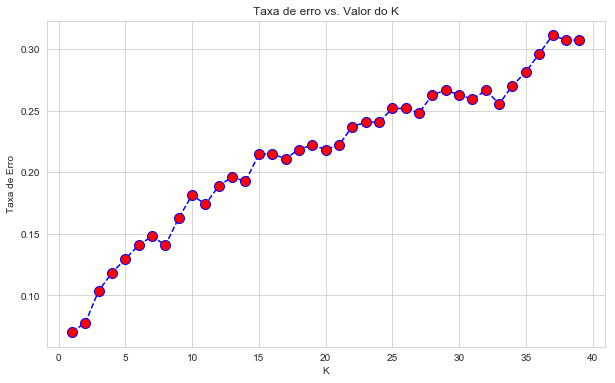

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taxa de erro vs. Valor do K')
plt.xlabel('K')
plt.ylabel('Taxa de Erro')

In [73]:
# K=32
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=32')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K=32


[[68  0  0  0]
 [ 0 31 26  7]
 [ 0 30 38  5]
 [ 0  0  4 61]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.51      0.48      0.50        64
           2       0.56      0.52      0.54        73
           3       0.84      0.94      0.88        65

   micro avg       0.73      0.73      0.73       270
   macro avg       0.73      0.74      0.73       270
weighted avg       0.72      0.73      0.73       270



# Utilizando DecisionTree e Random Forest 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
predictions = dtree.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[68  0  0  0]
 [ 0 53  4  7]
 [ 0  4 68  1]
 [ 0  1  4 60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.91      0.83      0.87        64
           2       0.89      0.93      0.91        73
           3       0.88      0.92      0.90        65

   micro avg       0.92      0.92      0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(n_estimators=600)

In [82]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
predictions = rfc.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[68  0  0  0]
 [ 0 58  0  6]
 [ 0 13 59  1]
 [ 0  0  4 61]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.82      0.91      0.86        64
           2       0.94      0.81      0.87        73
           3       0.90      0.94      0.92        65

   micro avg       0.91      0.91      0.91       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.91      0.91      0.91       270



# Utilizando SVM (Support Vector Machines)

In [86]:
from sklearn.svm import SVC

In [87]:
svc_model = SVC()

In [88]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [89]:
predictions = svc_model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[68  0  0  0]
 [ 0 17 39  8]
 [ 0  8 63  2]
 [ 0  0  5 60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.68      0.27      0.38        64
           2       0.59      0.86      0.70        73
           3       0.86      0.92      0.89        65

   micro avg       0.77      0.77      0.77       270
   macro avg       0.78      0.76      0.74       270
weighted avg       0.78      0.77      0.75       270



In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [94]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.9s finished
C:\Users\sarai\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [95]:
grid_predictions = grid.predict(X_test)

In [96]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[68  0  0  0]
 [ 0 29 30  5]
 [ 0 22 51  0]
 [ 0  2  3 60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.55      0.45      0.50        64
           2       0.61      0.70      0.65        73
           3       0.92      0.92      0.92        65

   micro avg       0.77      0.77      0.77       270
   macro avg       0.77      0.77      0.77       270
weighted avg       0.77      0.77      0.77       270



# Resultados consolidados

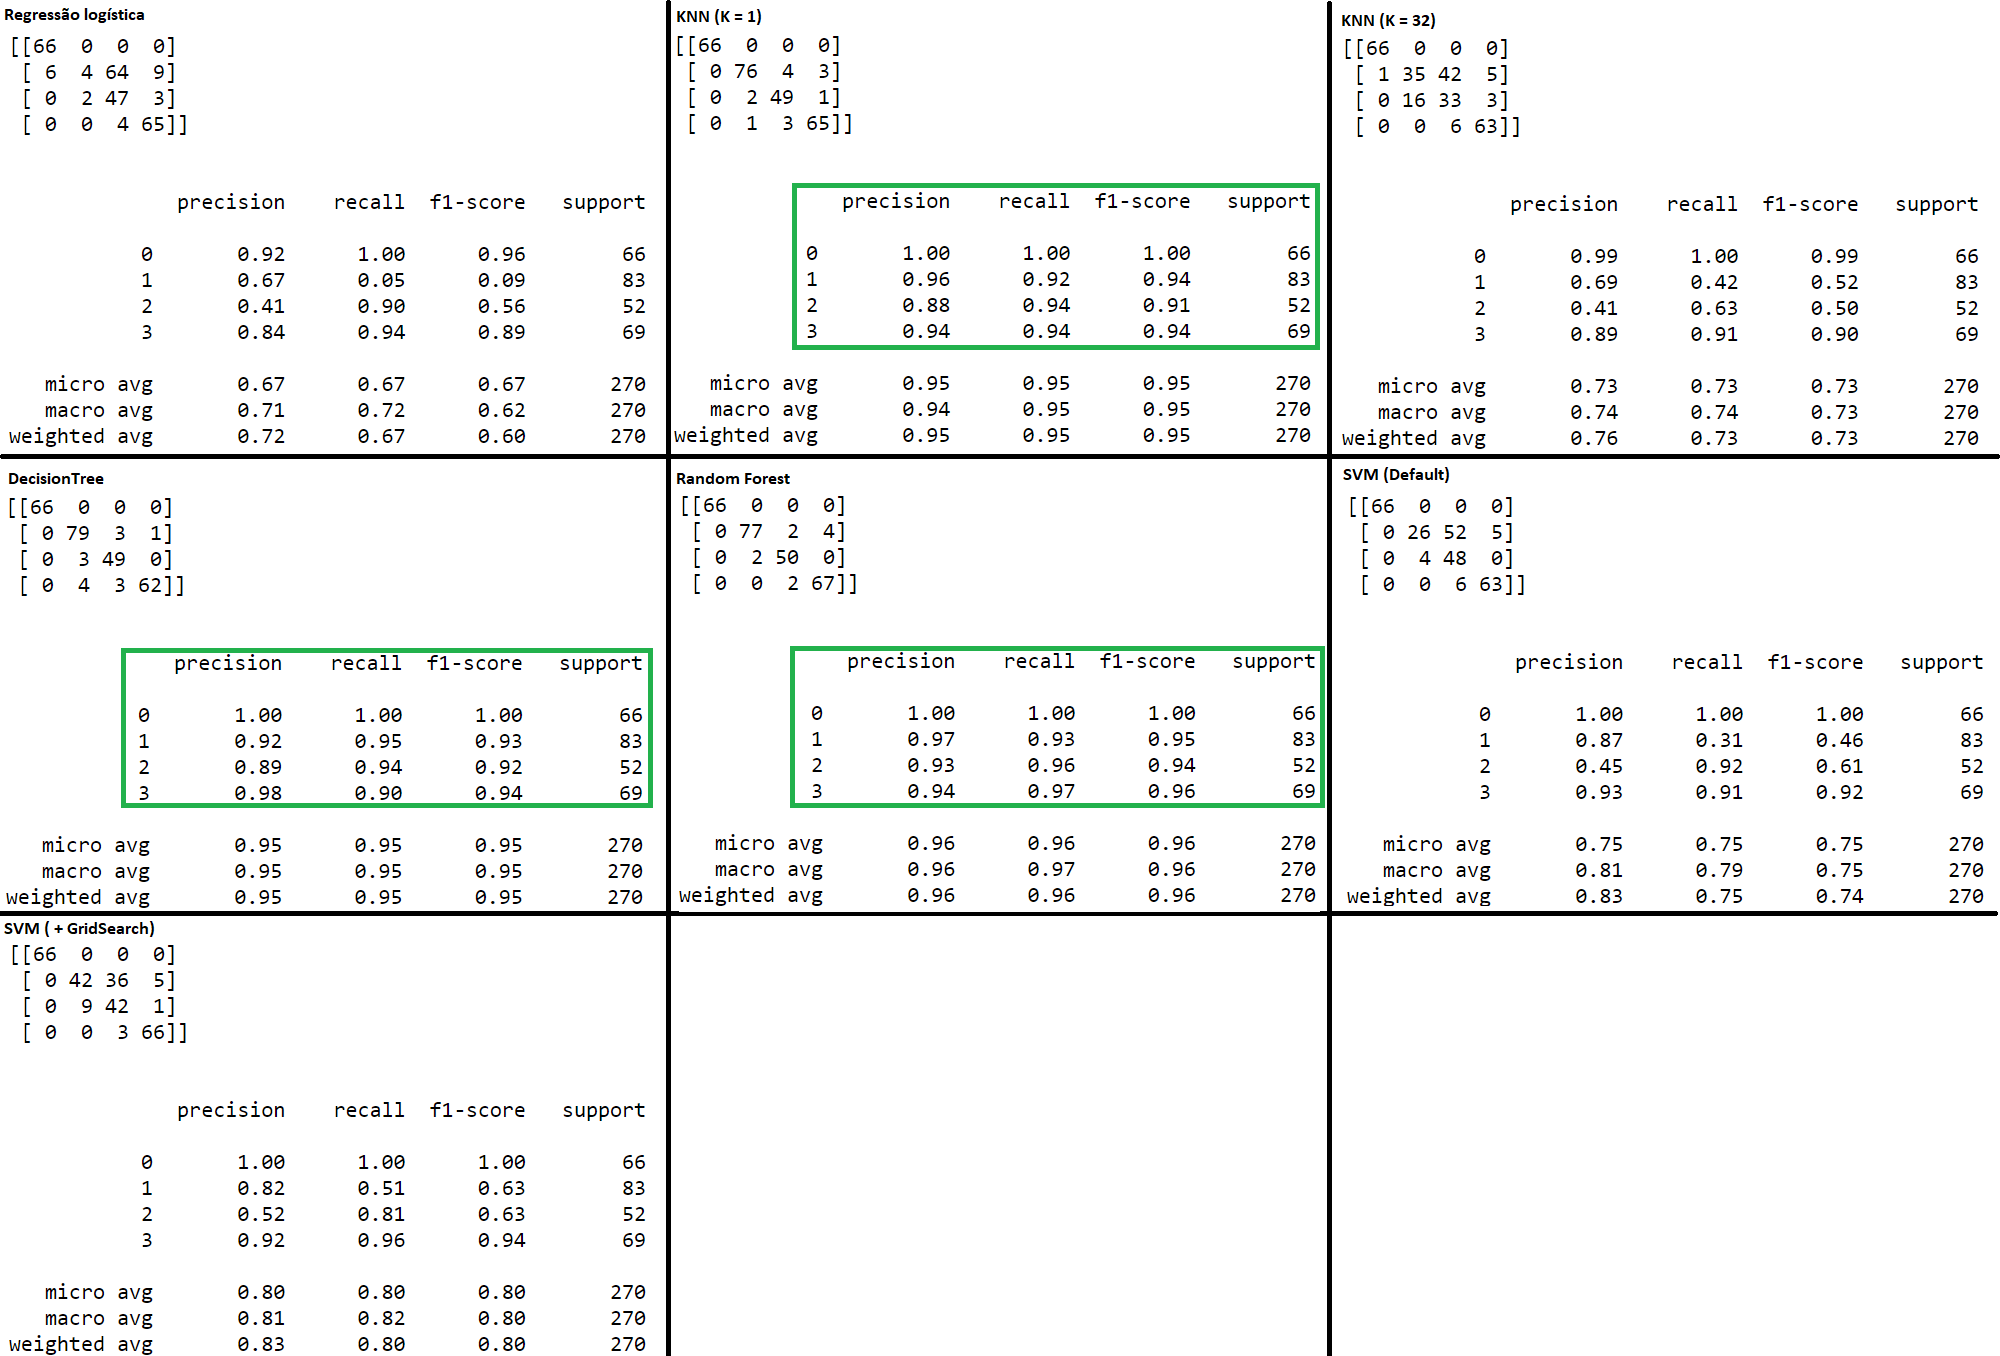

In [97]:
data = 'C:/Users/sarai/Documents/R/projects/itsml1/results2.png'
Image(data,width=1200, height=1000 )

# Considerações finais


<div style="text-align: justify">
É possível se utilizar a mineração de dados para identificar padrões de congestionamento dos dados em uma rede IoT do tipo veicular.
</div>
 <br>
<div style="text-align: justify">
Verificado que para o dataset utilizado, os algoritmos KNN, DecisionTree e Random Forest apresentaram os melhores resultados, embora no caso do KNN com K = 1 pode ocorrer Overfitting.
</div>
<br>
<div style="text-align: justify">
Como trabalho futuro será estudado como integrar a utilização dos modelos propostos em conjunto com o controlador de rede definido por software que determina as políticas da rede veicular, para adaptar-se dinâmicamente, atendendo com maior grau de eficiência os requisitos de comunicação das aplicações ITS.
</div>
 <br>
<div style="text-align: justify">
Também pretende-se estudar os principais parâmetros dos modelos apresentados para verificar como aperfeiçoar os resultados, bem como o uso de outros datasets de treino.
</div>